# Analytics - Product Quality - GitHub

#### Date: 2024/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM: Sentinelas

##### Semester: 2024/02
##### Professor: Hilmer Neri

##### Members:

- Member x
- Member y


### LIBRARIES

In [91]:
# Deal with data
import pandas as pd
import json
from glob import glob
import os

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Deal with type hints
from typing import List

# Deal with time
import datetime

### GRAPH SETTINGS

In [92]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [93]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Replace your repository names

In [ ]:
# Add your repos here
# Example: ['YourRepoName_1', 'YourRepoName_2']
repos_project = ['BACKEND-USUARIOS', 'FRONT', 'BACKEND-FINANCEIRO', 'BACKEND-BENEFICIOS']

#### Replace your build workflow .yml file name

In [95]:
# Set your build workflow .yml name
# Example: build.yml -> build
build_yml_name = "code-analysis"

#### Filter dates - Workflow Runs

In [96]:
# Set the dates you want to filter the analysis of workflow runs
# Example: start_date_workflow_runs = "2024-09-01"
#          end_date_workflow_runs = "2024-09-05"
start_date_workflow_runs = "2024-10-15" # to get all dates: "1999-01-01"
end_date_workflow_runs = "2025-02-20"   # to get all dates: "2199-01-01"

#### Filter dates - Team Throughput

In [97]:
# Set the dates you want to filter the analysis of issues
# Example: start_date_issues = "2024-09-01"
#          end_date_issues = "2024-09-05"
start_date_issues = "2024-10-15" # to get all dates: "1999-01-01"
end_date_issues = "2025-02-20"   # to get all dates: "2199-01-01"
### GitHub
##### Path to the folder with all your jsons

In [98]:
data_runs = glob('../analytics-raw-data/GitHub_API-Runs-fga-eps-mds-*.json')
data_issues = glob('../analytics-raw-data/GitHub_API-Issues-fga-eps-mds-*.json')

# Create Workflow Runs DataFrame

#### Unmarshall json

In [99]:
def unmarshall(json_path: str) -> dict:
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
    return json_obj

#### Extract Workflow Runs Data

In [100]:
def get_workflow_data():
    table_data = []
    for json_path in data_runs:
        dados = unmarshall(json_path)
        for run in dados["workflow_runs"]:
            updated_at = datetime.datetime.strptime(run["updated_at"], "%Y-%m-%dT%H:%M:%SZ")
            created_at = datetime.datetime.strptime(run["created_at"], "%Y-%m-%dT%H:%M:%SZ")
            feedback_time = (updated_at - created_at).total_seconds()
            
            workflow_id = run["id"]
            conclusion = run["conclusion"]
            author = run["actor"]["login"]
            workflow_yml_name = run["path"].split("/")[-1][:-4]

            repo = run["repository"]["name"].split("-")[-1]
            
            table_data.append({
                "Workflow_run ID": workflow_id,
                "Conclusion": conclusion,
                "Author": author,
                "Created at": created_at,
                "Updated at": updated_at,
                "Feedback Time": feedback_time,
                "Workflow .YML Name": workflow_yml_name,
                "Repository Name": repo
            })

    return table_data

#### Generate Workflow Runs DataFrame

In [101]:
def generate_workflow_runs_df(data: List[dict]) -> pd.DataFrame:
    df = pd.DataFrame(data)

    return df

In [102]:
workflow_run_df = generate_workflow_runs_df(get_workflow_data())
workflow_run_df.head()

,Workflow_run ID,Conclusion,Author,Created at,Updated at,Feedback Time,Workflow .YML Name,Repository Name
0,12856206900,None,clara-ribeiro,2025-01-19 18:39:51,2025-01-19 18:40:00,9.0,release,BENEFICIOS
1,12856206898,None,clara-ribeiro,2025-01-19 18:39:51,2025-01-19 18:39:59,8.0,ci,BENEFICIOS
2,12856206897,skipped,clara-ribeiro,2025-01-19 18:39:51,2025-01-19 18:39:53,2.0,release,BENEFICIOS
3,12856185400,failure,clara-ribeiro,2025-01-19 18:36:41,2025-01-19 18:39:16,155.0,ci,BENEFICIOS
4,12801044283,success,guipeeix7,2025-01-16 02:42:41,2025-01-16 02:42:57,16.0,release,BENEFICIOS


In [103]:
print(workflow_run_df)

     Workflow_run ID Conclusion           Author          Created at  \
0        12856206900       None    clara-ribeiro 2025-01-19 18:39:51   
1        12856206898       None    clara-ribeiro 2025-01-19 18:39:51   
2        12856206897    skipped    clara-ribeiro 2025-01-19 18:39:51   
3        12856185400    failure    clara-ribeiro 2025-01-19 18:36:41   
4        12801044283    success        guipeeix7 2025-01-16 02:42:41   
5        12801044280    failure        guipeeix7 2025-01-16 02:42:41   
6        12801044240    failure        guipeeix7 2025-01-16 02:42:41   
7        12801041415    failure        guipeeix7 2025-01-16 02:42:29   
8        12374206303    success    clara-ribeiro 2024-12-17 13:39:30   
9        12374206268    success    clara-ribeiro 2024-12-17 13:39:30   
10       12374204677    success    clara-ribeiro 2024-12-17 13:39:24   
11       12374122274    success    clara-ribeiro 2024-12-17 13:34:32   
12       12365946153    success        guipeeix7 2024-12-17 03:4

### Create dataframe per repository

In [104]:
repos_dataframes = []

for repo in repos_project:
    dataframe = workflow_run_df[workflow_run_df['Repository Name'] == repo]
    repos_dataframes.append({'name': repo, 'df': dataframe})

# Create Issues DataFrame

#### Extract Issues Data

In [105]:
def get_issues_data():
    for json_path in data_issues:
        dados = unmarshall(json_path)
        table_data = []
        for run in dados:
            created_at = run["created_at"]
            closed_at  = run["closed_at"]
            number = run["number"]
            title = run["title"]
            
            table_data.append({
                "Created at": created_at,
                "Closed at": closed_at,
                "Issue Number": number,
                "Issue Title": title,
            })

    return table_data

#### Generate Issues DataFrame

In [106]:
def generate_issues_df(data: List[dict]) -> pd.DataFrame:
    df = pd.DataFrame(data)

    df['Created at'] = pd.to_datetime(df['Created at'], format='%Y-%m-%dT%H:%M:%SZ')

    df['Closed at'] = pd.to_datetime(df['Closed at'], format='%Y-%m-%dT%H:%M:%SZ')
    
    return df

In [107]:
issues_df = generate_issues_df(get_issues_data())
issues_df.head()

,Created at,Closed at,Issue Number,Issue Title
0,2025-01-11 20:26:18,NaT,145,Ajustar a agenda de trabalho
1,2025-01-11 20:25:53,NaT,144,Ajustar Quadro de Conhecimento
2,2025-01-11 20:24:39,NaT,143,Ajustar Planilha de Custos
3,2025-01-11 20:24:16,NaT,142,Criar Templates de Contribuição
4,2025-01-11 20:23:57,NaT,141,Ajustar Uso de Labels para Contribuição


# Quality Aspect - Productivity

## Factor - Testing Performance

### CI Feedback Time

In [118]:
def ci_feedback_time(df: pd.DataFrame):
    feedback_times = []
    authors_feedback_times = {}
    ci_feedback_times = []

    # Filter for builds workflow runs only
    df_filtered = df[df["Workflow .YML Name"] == build_yml_name].copy()

    for run in df_filtered.index:
        updated_at = df["Updated at"][run]
        created_at = df["Created at"][run]
        feedback_time = (updated_at - created_at).total_seconds()
        feedback_times.append(feedback_time)

    ci_feedback_time = sum(feedback_times) / len(feedback_times)
    df_filtered.loc[:, "Ci Feedback Time"] = ci_feedback_time

    return df_filtered

### Extra: Count of Successes and Failures Workflows

In [119]:
def count_success_failure_workflow_runs(df: pd.DataFrame):
    counts = df['Conclusion'].value_counts()

    num_failures = counts.get('failure', 0)
    num_successes = counts.get('success', 0)

    return num_failures, num_successes

## Factor - Issues' Velocity

### Team Throughput

In [120]:
def team_throughput(df: pd.DataFrame, start_date: str, end_date: str):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    df_date_filtered = df[(df['Created at'] >= start_date) & (df['Closed at'] <= end_date + pd.Timedelta(days=1))]
    df_created = df[(df['Created at'] >= start_date)]

    return len(df_date_filtered[df_date_filtered["Closed at"].notnull()]), len(df_created)

## Calculate measures (workflow runs) for each repository

Filter the dataset with the set dates in the notebook's beginning.

In [121]:
def create_metrics_df(start_date: str, end_date: str) -> pd.DataFrame:
    
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    m1_list = []
    m2_list = []
    m3_list = []

    repository_list = []
    version_list = []

    for repo_info in repos_dataframes:
        repo_df = repo_info["df"]

        repo_df['Updated at'] = pd.to_datetime(repo_df['Updated at'])

        # Filter the selected date range
        df_date_filtered = repo_df[(repo_df['Updated at'] >= start_date) & (repo_df['Updated at'] <= end_date + pd.Timedelta(days=1))]

        try:
            m1_list.append(ci_feedback_time(df_date_filtered))
        except Exception:
            m1_list.append(0)

        try:
            m2_list.append(count_success_failure_workflow_runs(df_date_filtered))
        except Exception:
            m2_list.append(0)

        repository_list.append(repo_info['name'])

    return m1_list, m2_list, repository_list

In [122]:
m1_list, m2_list, repository_list = create_metrics_df(start_date_workflow_runs, end_date_workflow_runs)

/var/folders/pw/xw0wr4zj0wvg3gslx4d188dr0000gp/T/ipykernel_70388/3981976724.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repo_df['Updated at'] = pd.to_datetime(repo_df['Updated at'])


## Plotting Metrics Functions

### Generate CI Feedback Time Plots

In [123]:
def ci_feedback_time_plots(df: pd.DataFrame, repo_name: str):
    temp = df[['Created at', 'Ci Feedback Time']]
    dates = temp.groupby(['Created at']).mean().reset_index()
    dates['Created at'] = pd.to_datetime(dates['Created at'])

    plt.figure(figsize=(15, 7))
    plt.plot(range(len(dates)), dates['Ci Feedback Time'], marker='o', color='b', label='Feedback Time')
    plt.xlabel("Created at")
    plt.ylabel("CI FeedBack Time")
    plt.title(f"CI FeedBack Time By Creation Date - {repo_name}")
    plt.xticks(range(len(dates)), dates['Created at'].dt.strftime('%Y-%m-%d'), rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Generate Count of Successes and Failures Workflows Plots

In [124]:
def count_sucess_failure_workflow_plot(data: list, repo_name: str):
    labels = ["Success", "Failure"]
    sizes = [data[1], data[0]]
    plt.figure(figsize=(15, 7))
    colors = ['lightgreen', 'crimson']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
    plt.title(f"Count of Workflows Runs Success and Failures - {repo_name}")
    plt.legend(labels, loc='best')
    plt.tight_layout()
    plt.show()

### Generate Throughput Pie Plot

In [125]:
def team_throughput_plot(data: list):
    labels = ["Closed Issues", "Not Closed Issues"]
    sizes = [data[0], data[1]-data[0]]
    plt.figure(figsize=(15, 7))
    colors = ['lightgreen', 'crimson']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
    plt.title("Team Throughput Over a Date Range")
    plt.legend(labels, loc='best')
    plt.tight_layout()
    plt.show()

## Data Visualization

In this area you will need to plot the metrics of each repository in the selected date range.

In [126]:
print(repository_list)

['FRONT', 'BACKEND-USUARIOS', 'BACKEND-FINANCEIRO', 'BACKEND-BENEFICIOS']


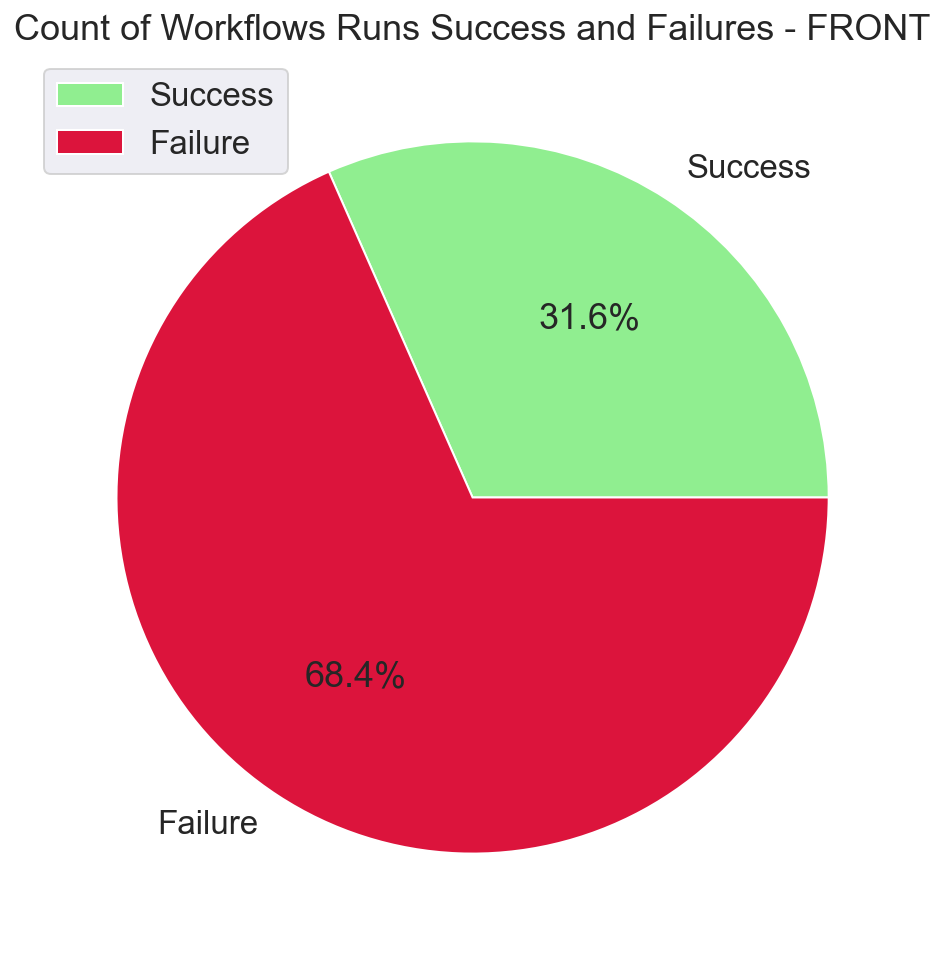

TypeError: 'int' object is not subscriptable

In [133]:
for repo in range(len(repository_list)):
    count_sucess_failure_workflow_plot(m2_list[repo], repository_list[repo])
    ci_feedback_time_plots(m1_list[repo], repository_list[repo])

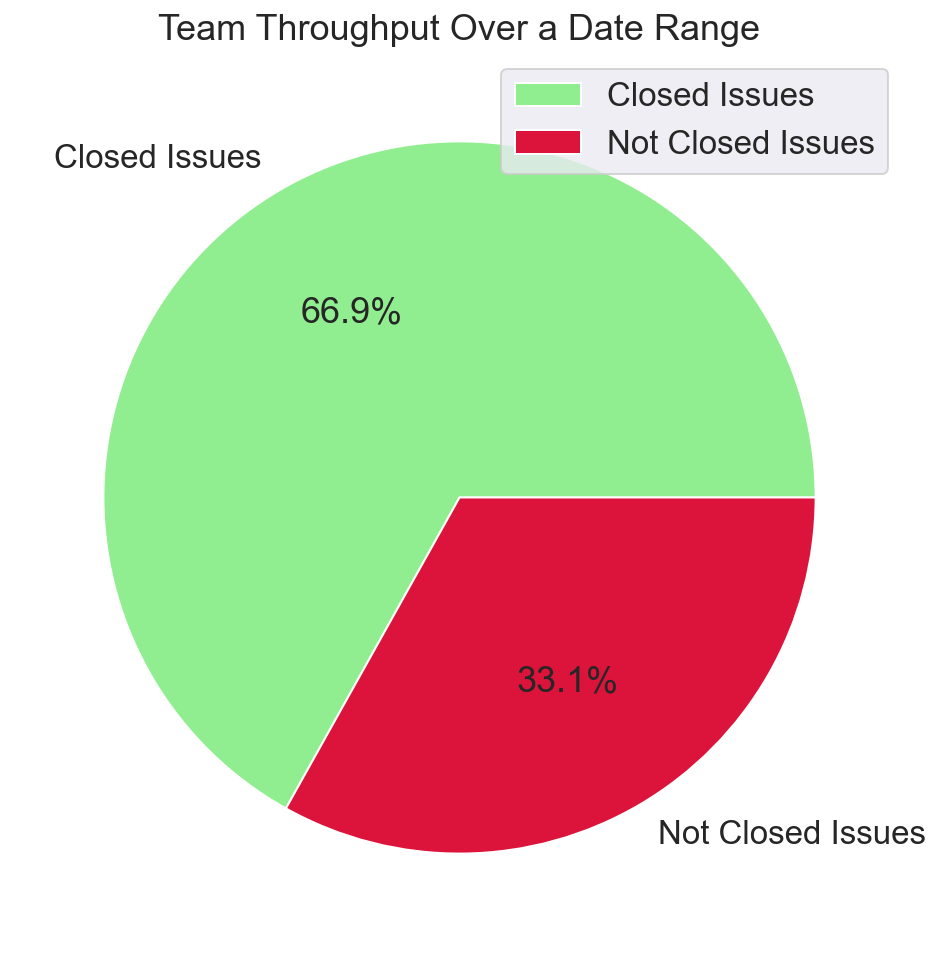

In [ ]:
team_throughput_plot(team_throughput(issues_df, start_date_issues, end_date_issues))